In [ ]:
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc
from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw
from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG
from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.layers import Input
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

<ipython-input-2-4d310dce1b14>:26: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import zoom


In [ ]:
import tensorflow as tf

In [ ]:
import imageio

In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))

        X.append(np.array(img))
        Z.append(str(label))

In [ ]:

from google.colab import drive
drive.mount("/content/gdrive")

MessageError: ignored

In [ ]:
!ls "/content/gdrive/MyDrive/data.zip"

In [ ]:
!unzip  "/content/gdrive/MyDrive/data.zip"

In [ ]:
ya = '/content/data/ya'
yab = '/content/data/yab'
yac = '/content/data/yac'
yad = '/content/data/yad'
yadd = '/content/data/yadd'
yae = '/content/data/yae'
yaf = '/content/data/yaf'
yag = '/content/data/yag'
yagh = '/content/data/yagh'
yagw = '/content/data/yagw'
yah = '/content/data/yah'
yahh = '/content/data/yahh'
yaj = '/content/data/yaj'
yak = '/content/data/yak'
yakw = '/content/data/yakw'
yal = '/content/data/yal'
yam = '/content/data/yam'
yan = '/content/data/yan'
yaq = '/content/data/yaq'
yar = '/content/data/yar'
yarr = '/content/data/yarr'
yas = '/content/data/yas'
yass = '/content/data/yass'
yat = '/content/data/yat'
yatt = '/content/data/yatt'
yaw = '/content/data/yaw'
yax = '/content/data/yax'
yay = '/content/data/yay'
yaz = '/content/data/yaz'
yazz = '/content/data/yazz'
yey = '/content/data/yey'
yi = '/content/data/yi'
yu = '/content/data/yu'


X = []
Z = []
imgsize = 128


training_data('ya',ya)
training_data('yab',yab)
training_data('yac',yac)
training_data('yad',yad)
training_data('yadd',yadd)
training_data('yae',yae)
training_data('yaf',yaf)
training_data('yag',yag)
training_data('yagh',yagh)
training_data('yagw',yagw)
training_data('yah',yah)
training_data('yahh',yahh)
training_data('yaj',yaj)
training_data('yak',yak)
training_data('yakw',yakw)
training_data('yal',yal)
training_data('yam',yam)
training_data('yan',yan)
training_data('yaq',yaq)
training_data('yar',yar)
training_data('yarr',yarr)
training_data('yas',yas)
training_data('yass',yass)
training_data('yat',yat)
training_data('yatt',yatt)
training_data('yaw',yaw)
training_data('yax',yax)
training_data('yay',yay)
training_data('yaz',yaz)
training_data('yazz',yazz)
training_data('yey',yey)
training_data('yi',yi)
training_data('yu',yu)

In [ ]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,33)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(38840, 128, 128, 3) (9710, 128, 128, 3) (38840, 33) (9710, 33)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

augs_gen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False  ,
        rotation_range=0,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=False,
        vertical_flip=False)



In [ ]:
augs_gen.fit(x_train)
augs_gen.fit(x_test)

In [ ]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(38840, 128, 128, 3) (9710, 128, 128, 3) (38840, 33) (9710, 33)


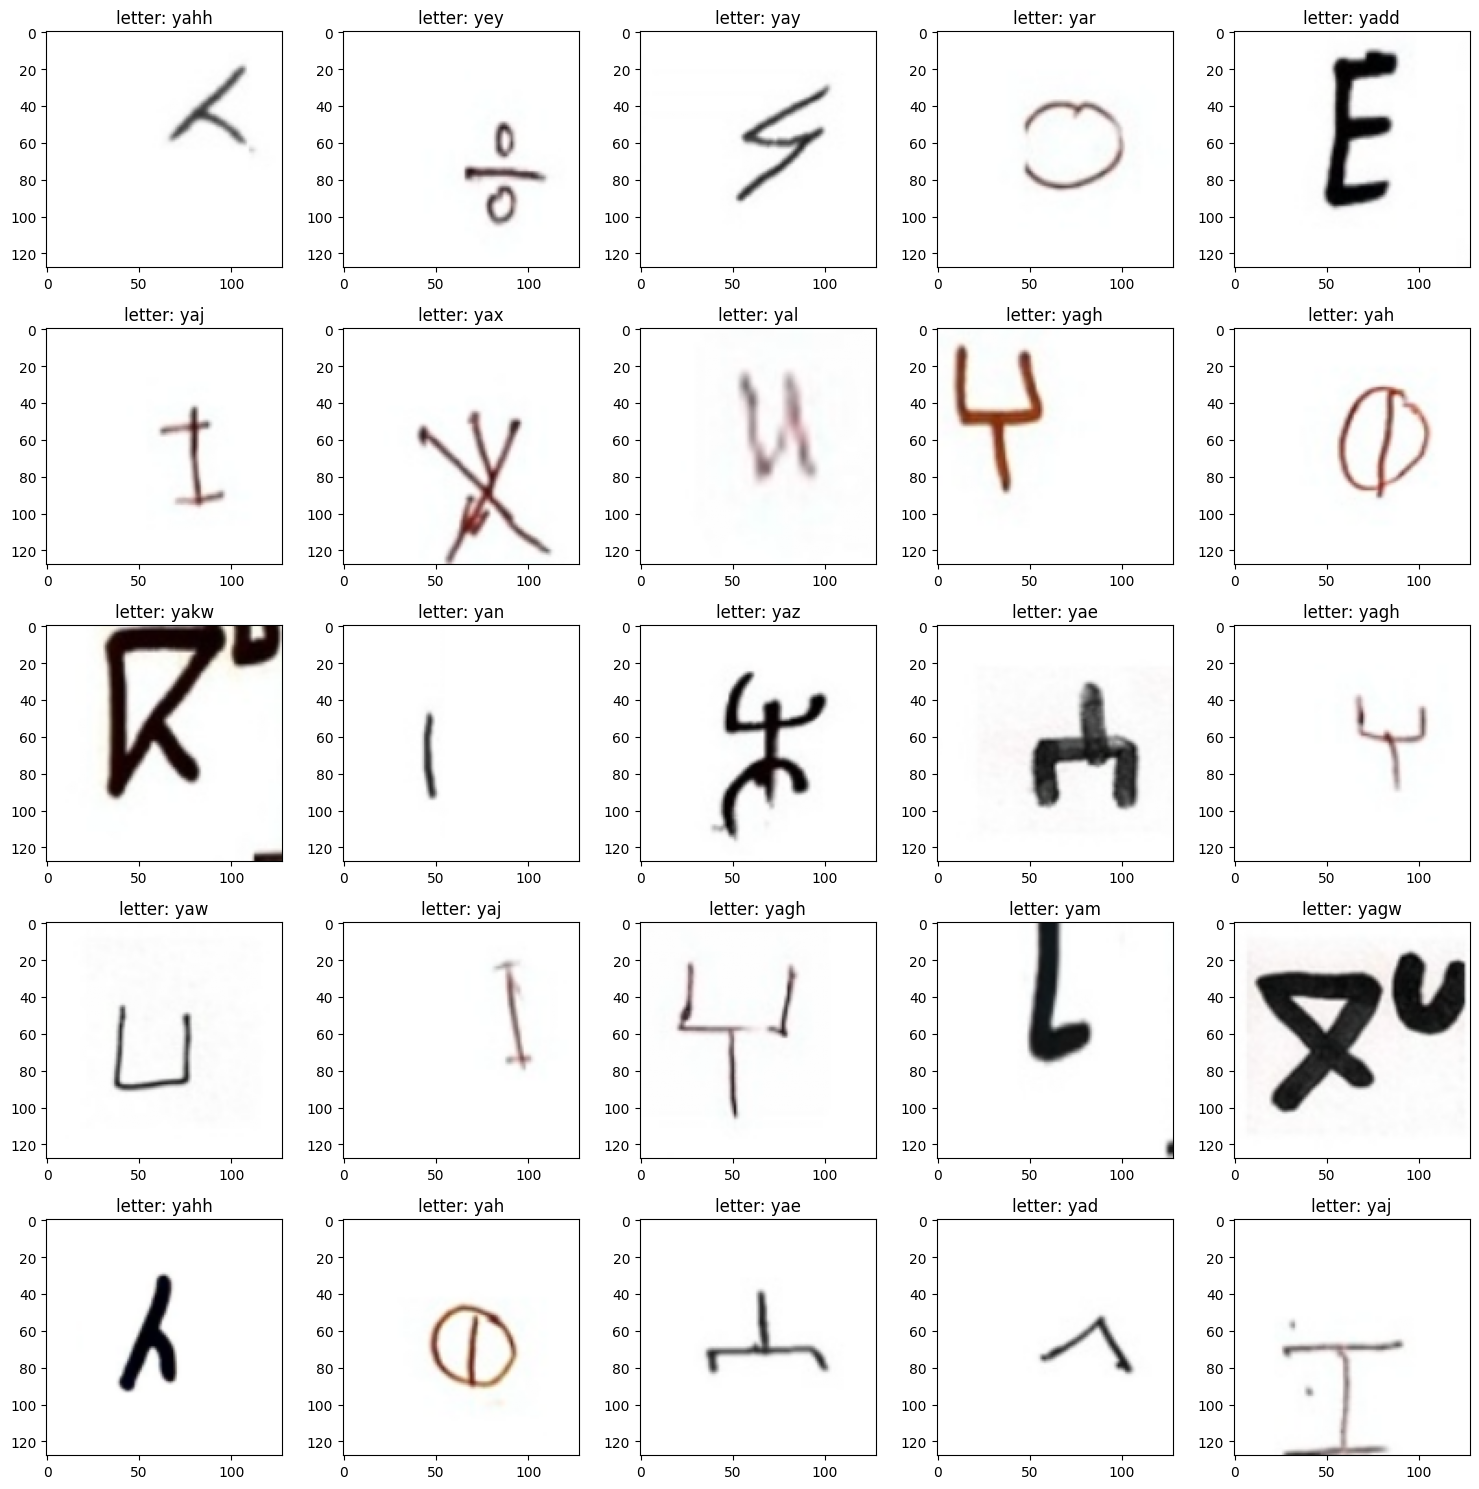

In [ ]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('letter: '+Z[l])

plt.tight_layout()

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
FREEZE_LAYERS = 15
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')


for layer in base_model.layers:
    print(layer,layer.trainable)



x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', name='top-fc1')(x)
x = Dense(128, activation='relu', name='top-fc2')(x)
x = Dropout(0.3)(x)


output_layer = Dense(33, activation='softmax', name='softmax')(x)
model = Model(inputs=base_model.input, outputs=output_layer)

for layer in model.layers[:FREEZE_LAYERS]:
    layer.trainable = False


for layer in model.layers[FREEZE_LAYERS:]:
    layer.trainable = True



model.compile(optimizer=Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

58889256/58889256 [==============================] - 0s 0us/step


<keras.engine.input_layer.InputLayer object at 0x7f9afdfeb9a0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9afdf4c6a0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9b75a19130> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f9b75a0e280> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9b75a19280> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9b74ab76d0> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f9b75a0e550> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9b74ab7220> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9b74ac8160> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9b74ac88b0> True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f9b75a0e6d0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9b74ac13a0> True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f9be0bd8be0> True
<keras.layers.convolutional.conv2d.

In [ ]:
checkpoint = ModelCheckpoint(
    filepath = '/content/gdrive/My Drive/base.model3',
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    period=1
)



earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = '/content/gdrive/My Drive/logs3',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "/content/gdrive/My Drive/training_csv3.log" ,
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [ ]:

opt = SGD(learning_rate=1e-4,momentum=0.99)
opt1 = Adam(learning_rate=1e-3)




history = model.fit(
    augs_gen.flow(x_train,y_train,batch_size=128),
    validation_data  = (x_test,y_test),
    validation_steps = len(x_test)//128,
    steps_per_epoch  = len(x_train)//128,
    epochs = 25,
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/25
303/303 [==============================] - ETA: 0s - loss: 1.4788 - accuracy: 0.5518

303/303 [==============================] - 150s 447ms/step - loss: 1.4788 - accuracy: 0.5518 - val_loss: 0.2410 - val_accuracy: 0.9461 - lr: 0.0010
Epoch 2/25
303/303 [==============================] - ETA: 0s - loss: 0.2717 - accuracy: 0.9337

303/303 [==============================] - 131s 431ms/step - loss: 0.2717 - accuracy: 0.9337 - val_loss: 0.1349 - val_accuracy: 0.9657 - lr: 0.0010
Epoch 3/25
303/303 [==============================] - ETA: 0s - loss: 0.1968 - accuracy: 0.9525

303/303 [==============================] - 130s 429ms/step - loss: 0.1968 - accuracy: 0.9525 - val_loss: 0.1280 - val_accuracy: 0.9732 - lr: 0.0010
Epoch 4/25
303/303 [==============================] - ETA: 0s - loss: 0.1769 - accuracy: 0.9584

303/303 [==============================] - 130s 430ms/step - loss: 0.1769 - accuracy: 0.9584 - val_loss: 0.1469 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 5/25
303/303 [==============================] - ETA: 0s - loss: 0.1626 - accuracy: 0.9618

303/303 [==============================] - 130s 430ms/step - loss: 0.1626 - accuracy: 0.9618 - val_loss: 0.1096 - val_accuracy: 0.9726 - lr: 0.0010
Epoch 6/25
303/303 [==============================] - ETA: 0s - loss: 0.1451 - accuracy: 0.9662

303/303 [==============================] - 130s 429ms/step - loss: 0.1451 - accuracy: 0.9662 - val_loss: 0.1241 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 7/25
303/303 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 0.9674

303/303 [==============================] - 130s 429ms/step - loss: 0.1355 - accuracy: 0.9674 - val_loss: 0.1307 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 8/25
303/303 [==============================] - ETA: 0s - loss: 0.1271 - accuracy: 0.9691

303/303 [==============================] - 129s 427ms/step - loss: 0.1271 - accuracy: 0.9691 - val_loss: 0.0954 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 9/25
303/303 [==============================] - ETA: 0s - loss: 0.1255 - accuracy: 0.9692

303/303 [==============================] - 132s 436ms/step - loss: 0.1255 - accuracy: 0.9692 - val_loss: 0.1394 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 10/25
303/303 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9719

303/303 [==============================] - 130s 429ms/step - loss: 0.1102 - accuracy: 0.9719 - val_loss: 0.0906 - val_accuracy: 0.9770 - lr: 0.0010
Epoch 11/25
303/303 [==============================] - ETA: 0s - loss: 0.1147 - accuracy: 0.9723

303/303 [==============================] - 131s 434ms/step - loss: 0.1147 - accuracy: 0.9723 - val_loss: 0.1102 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 12/25
303/303 [==============================] - ETA: 0s - loss: 0.1137 - accuracy: 0.9734

303/303 [==============================] - 130s 429ms/step - loss: 0.1137 - accuracy: 0.9734 - val_loss: 0.1056 - val_accuracy: 0.9765 - lr: 0.0010
Epoch 13/25
303/303 [==============================] - ETA: 0s - loss: 0.1141 - accuracy: 0.9727


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
303/303 [==============================] - 130s 430ms/step - loss: 0.1141 - accuracy: 0.9727 - val_loss: 0.1020 - val_accuracy: 0.9757 - lr: 0.0010
Epoch 14/25
303/303 [==============================] - ETA: 0s - loss: 0.0753 - accuracy: 0.9808

303/303 [==============================] - 131s 431ms/step - loss: 0.0753 - accuracy: 0.9808 - val_loss: 0.0625 - val_accuracy: 0.9843 - lr: 1.0000e-04
Epoch 15/25
303/303 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9838

303/303 [==============================] - 130s 430ms/step - loss: 0.0588 - accuracy: 0.9838 - val_loss: 0.0614 - val_accuracy: 0.9846 - lr: 1.0000e-04
Epoch 16/25
303/303 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.9850

303/303 [==============================] - 130s 430ms/step - loss: 0.0542 - accuracy: 0.9850 - val_loss: 0.0590 - val_accuracy: 0.9849 - lr: 1.0000e-04
Epoch 17/25
303/303 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 0.9853

303/303 [==============================] - 131s 431ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0594 - val_accuracy: 0.9850 - lr: 1.0000e-04
Epoch 18/25
303/303 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9859

303/303 [==============================] - 130s 428ms/step - loss: 0.0503 - accuracy: 0.9859 - val_loss: 0.0601 - val_accuracy: 0.9849 - lr: 1.0000e-04
Epoch 19/25
303/303 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.9861

303/303 [==============================] - 130s 429ms/step - loss: 0.0480 - accuracy: 0.9861 - val_loss: 0.0563 - val_accuracy: 0.9858 - lr: 1.0000e-04
Epoch 20/25
303/303 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9861

303/303 [==============================] - 130s 429ms/step - loss: 0.0468 - accuracy: 0.9861 - val_loss: 0.0587 - val_accuracy: 0.9858 - lr: 1.0000e-04
Epoch 21/25
303/303 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9870

303/303 [==============================] - 130s 429ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0597 - val_accuracy: 0.9856 - lr: 1.0000e-04
Epoch 22/25
303/303 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9870


Epoch 22: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
303/303 [==============================] - 131s 431ms/step - loss: 0.0443 - accuracy: 0.9870 - val_loss: 0.0562 - val_accuracy: 0.9864 - lr: 1.0000e-04
Epoch 23/25
303/303 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9880

303/303 [==============================] - 130s 429ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0555 - val_accuracy: 0.9864 - lr: 1.0000e-05
Epoch 24/25
303/303 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9879

303/303 [==============================] - 130s 429ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0552 - val_accuracy: 0.9864 - lr: 1.0000e-05
Epoch 25/25
303/303 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.9879

303/303 [==============================] - 130s 428ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0553 - val_accuracy: 0.9866 - lr: 1.0000e-05


In [ ]:
model.save('/content/gdrive/My Drive/model_3.h5')

Weights Saved


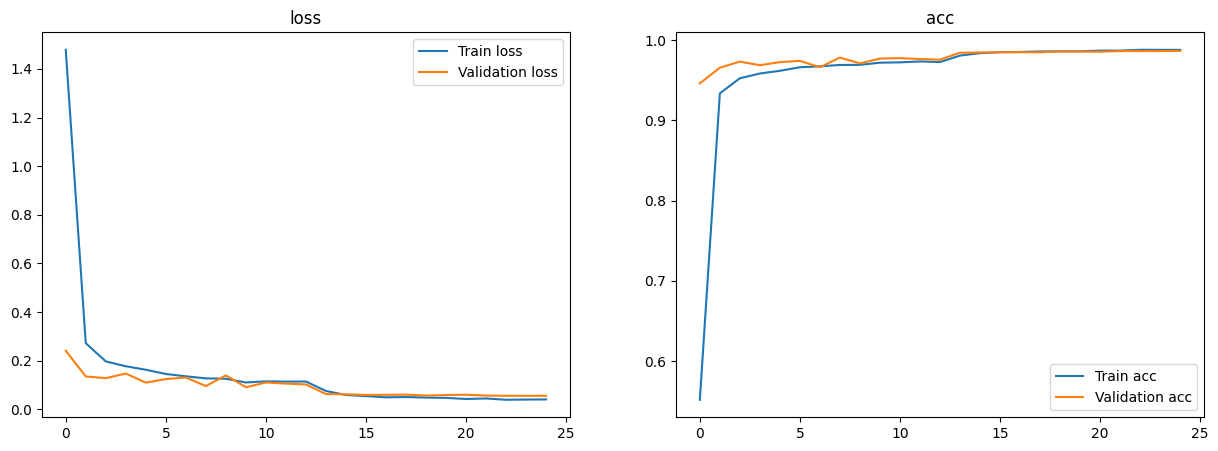

In [ ]:
show_final_history(history)
model.save_weights('/content/gdrive/My Drive/base.model_3'.format(epoch=0))

model_json = model.to_json()
with open("/content/gdrive/My Drive/model_3.json","w") as json_file:
    json_file.write(model_json)

print("Weights Saved")